# Analisis penjualan game

Pada analisis kali ini saya ingin menganalisis sebuah dataset penjualan game, disini saya ingin menganalisis faktor apa saya yang mempengaruhi penjualan suatu game, dan melihat pola penjualan game yang memiliki penjualan yang bisa dikatakan baik, dan harapannya nantinya saran yang saya berikan dari analisis ini akan berguna bagi pengembang game or stakeholder lainnya dalam mendistribusikan game, sehingga mendapat hasil yang baik

# Goals

1. melihat pengaruh apa saja yang mempengaruhi penjualan dari sebuah game
2. menganalisis apakah seiiring berjalannya waktu platform juga berpengaruh pada kesuksesan penjualan suatu judul game
3. menganalisis di setiap region apakah ada pengaruh dalam penjualan game?

In [1]:
#Memasukkan library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

Ganti nama kolom (jadikan semua huruf kecil).

In [3]:
data = data.rename(columns=str.lower)

Menghitung Jumlah nilai yang hilang

In [4]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

melihat tipe data setiap column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Persiapan data

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
data.loc[data['user_score']=='tbd','user_score']=np.nan

karena disini ada nilai tbd, saya mengubah menjadi nilai nan, karena maksdunya tbd disini maksdunya masih kosong 

In [9]:

data['user_score']= pd.to_numeric(data['user_score'],errors='coerce')

mengubah tipe data user score menjadi numerik, tetapi karena ada nilai yang hilang pada column ini sebetulnya tidak bisa,tetapi saya membiarkan nilai NaN sehingga bisa di konversi

In [10]:
#melakukan drop pada column name karena errornya sedikit dan tidak berpengaruh jika di drop datanya karena nilainya null
data = data.dropna(subset=['name'])

In [11]:
year_dict = data.groupby(['genre']).agg({'year_of_release':'median','critic_score':'median','user_score':'median'})
year_dict


,year_of_release,critic_score,user_score
genre,,,
Action,2009.0,68.0,7.4
Adventure,2009.0,66.0,7.6
Fighting,2005.0,72.0,7.6
Misc,2008.0,69.0,7.1
Platform,2004.0,69.0,7.7
Puzzle,2007.0,70.0,7.5
Racing,2005.0,69.0,7.4
Role-Playing,2008.0,74.0,7.8
Shooter,2007.0,73.0,7.4


membuat dictionary untuk mengganti nilai year_release, critic_score, user_score yang nilainya NaN, saya mengisi nilai yang NaN 
berdasarkan median dari masing masing column yang hilang dan mengelompokkan berdasarkan genre,karena genre merupakan column yang
nilainya tidak ada yang hilang

In [13]:
for i in data['genre'].unique():
    data.loc[(data['genre']==i) & (data['year_of_release'].isna()),'year_of_release']= \
    year_dict.loc[year_dict.index == i, 'year_of_release'][0]

mengisi nilai nan di year_of_release

In [14]:
for j in data['genre'].unique():
    data.loc[(data['genre']==j) & (data['critic_score'].isna()),'critic_score'] = \
    year_dict.loc[year_dict.index == i, 'critic_score'][0]

mengisi nilai nan di critic_score

In [15]:
for k in data['genre'].unique():
    data.loc[(data['genre'] == k) &(data['user_score'].isna()),'user_score'] = \
    year_dict.loc[year_dict.index == k, 'user_score'][0]
    

mengisi nilai nan di user_score

In [22]:
data_dict = data[['name','platform','rating']].drop_duplicates().dropna()
data_dict

,name,platform,rating
0,Wii Sports,Wii,E
2,Mario Kart Wii,Wii,E
3,Wii Sports Resort,Wii,E
6,New Super Mario Bros.,DS,E
7,Wii Play,Wii,E
...,...,...,...
16697,Bust-A-Move 3000,GC,E
16698,Mega Brain Boost,DS,E
16702,STORM: Frontline Nation,PC,E10+
16704,Plushees,DS,E


In [23]:
data_game = data_dict.drop_duplicates(subset='name')
data_game_dict = dict(zip(data_game['name'],data_game['rating']))
data['rating'] = data['rating'].replace(data_game_dict)

In [24]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

untuk nilai rating memang tidak bisa diatasi sepenuhnya untuk nilai yang hilang, untuk metode yang saya gunakan dengan menggunakan dictionary berdasarkan nama game plaftorm untuk mencari rating tidak bisa mengisi seluruh nilai yang hilang pada rating

In [25]:
data.info()
data['year_of_release'] = data['year_of_release'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


mengkonversi column tahun menjadi int

In [26]:
data['total_sales']=  data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,73.0,7.7,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,73.0,7.8,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,73.0,7.4,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,73.0,7.4,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,73.0,7.6,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,73.0,7.7,NaN,0.01


Menghitung total penghasilan di semua region dengan membuat kolom baru

# EDA

## Melihat penyebaran total game yang rilis berdasarkan tahun

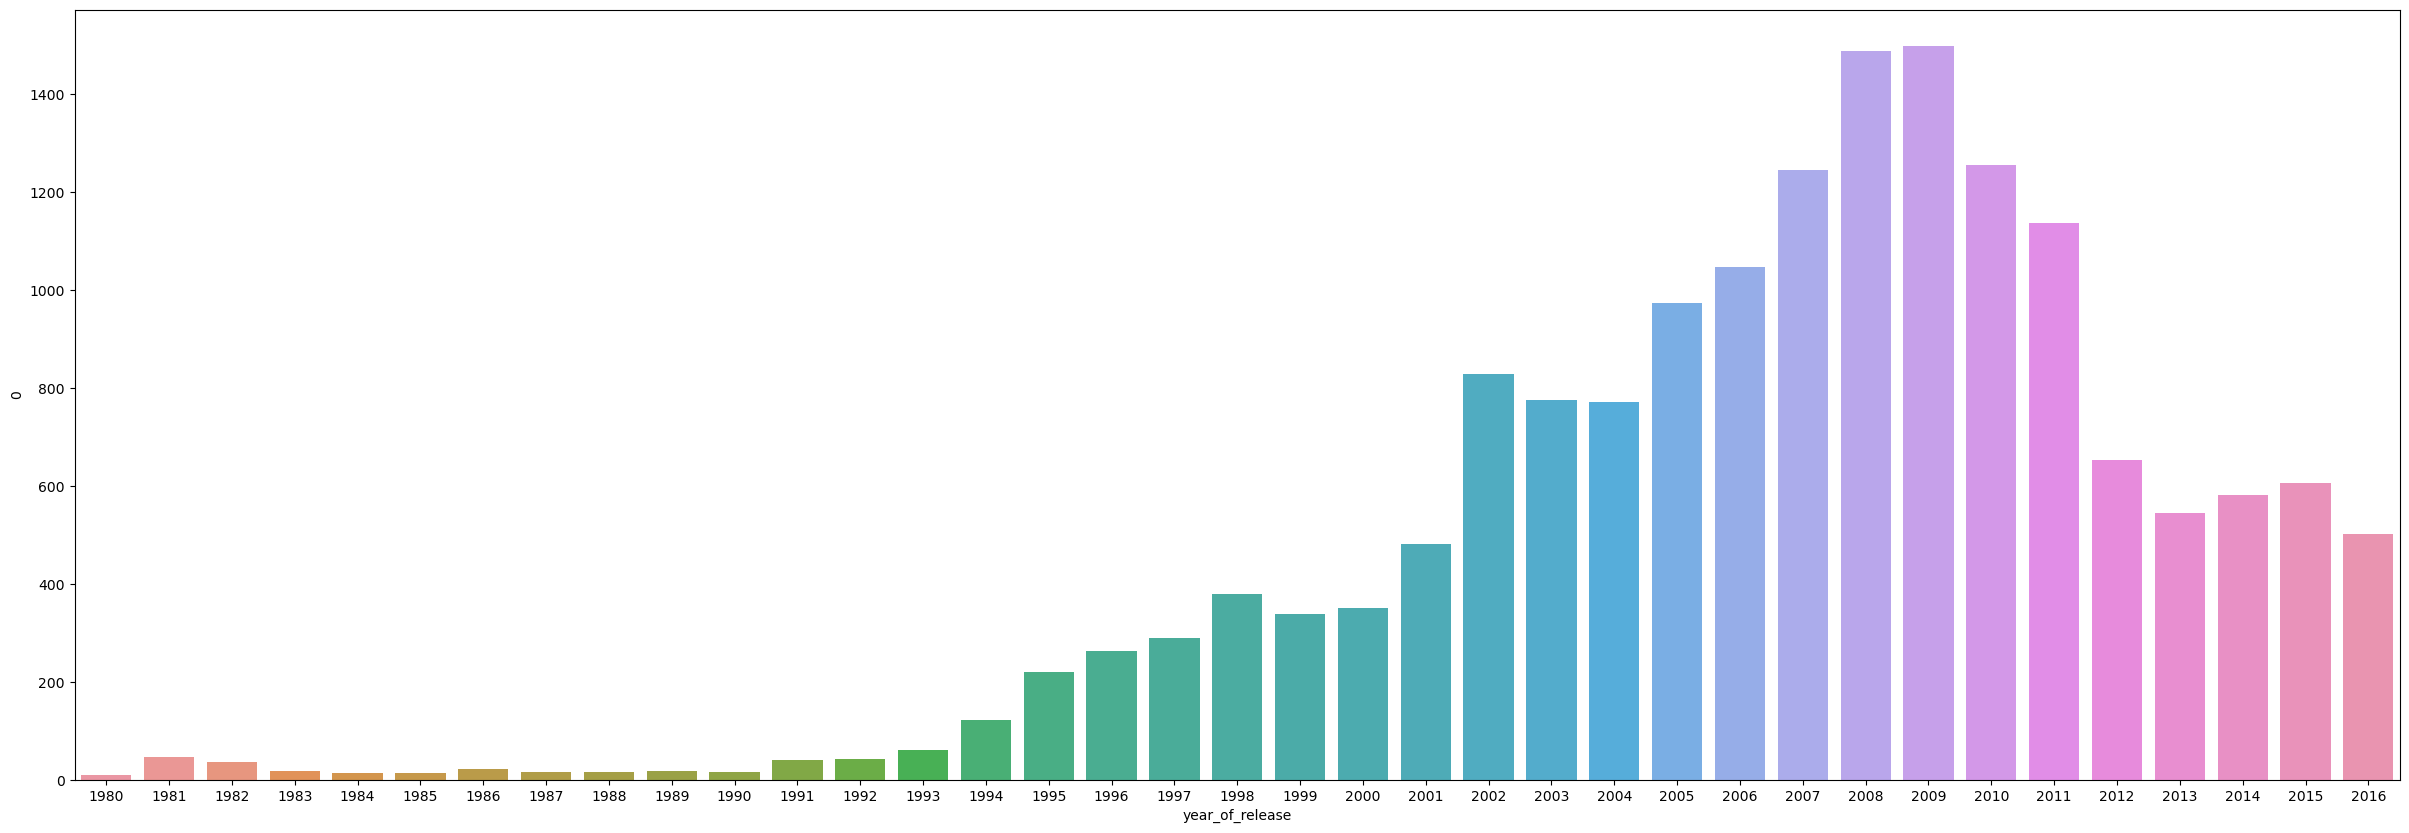

In [27]:
game_year = data.groupby('year_of_release').size().reset_index()
plt.figure(figsize=(30,10))
sns.barplot(data = game_year,x='year_of_release',y=0)
plt.show()

## Memilih platform dengan total penjualan terbesar dan buatlah distribusinya berdasarkan data per tahun. Temukan platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun

In [28]:
data.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [29]:
#melihat penjualan platform pertahun
def sales_per_platform(data,platform):
    data = data[data['platform']==platform]
    plat = data.groupby('year_of_release')['total_sales'].sum().reset_index()
    plt.figure(figsize=(20,10))
    sns.barplot(data=plat,x='year_of_release',y='total_sales')
    plt.show()


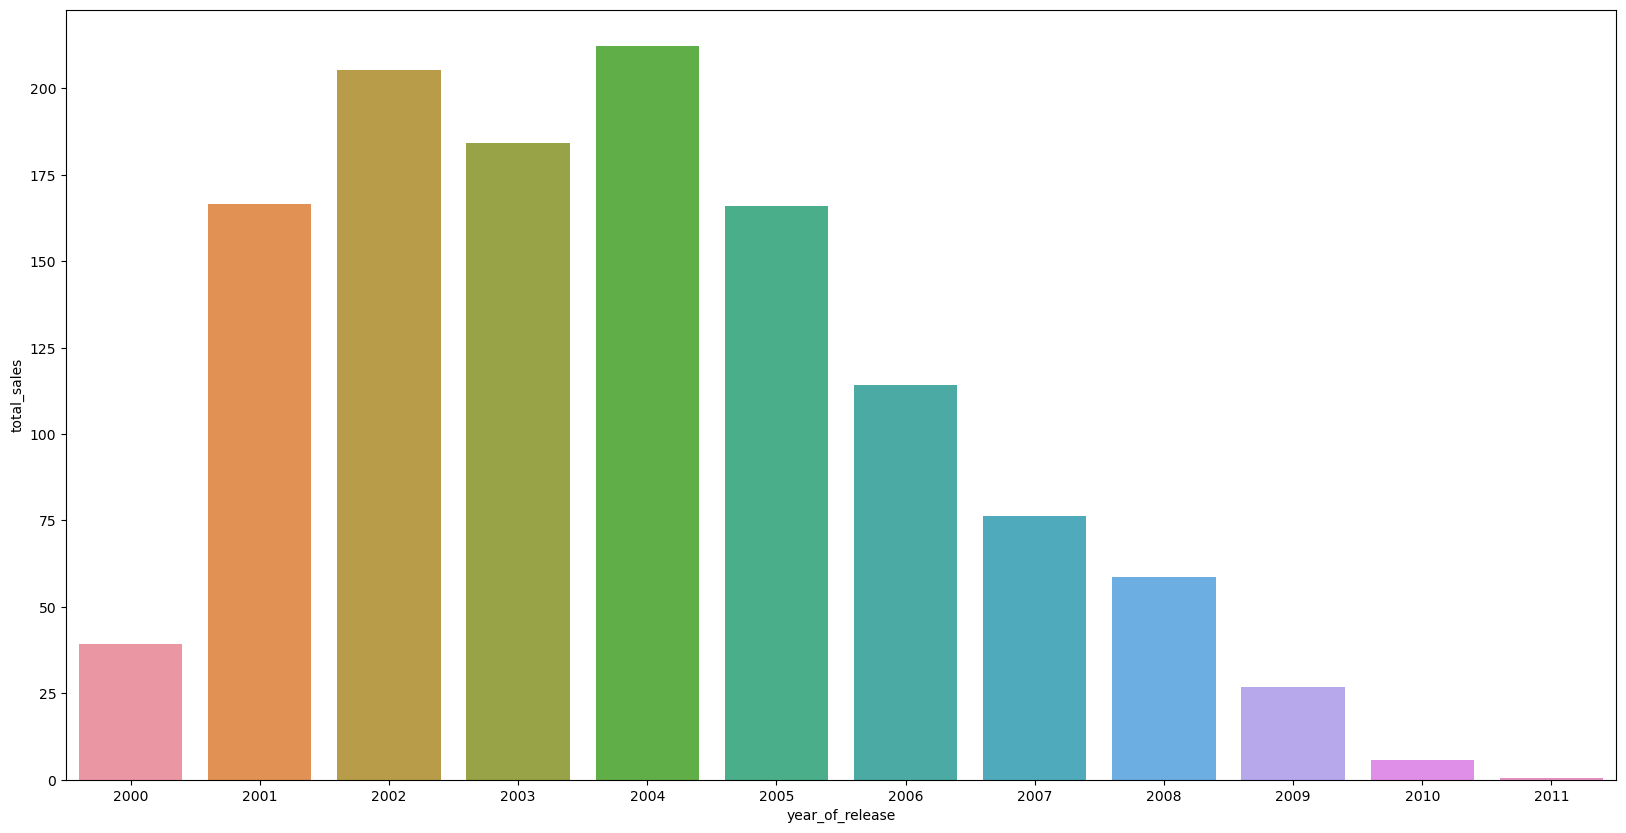

In [30]:
sales_per_platform(data,'PS2')

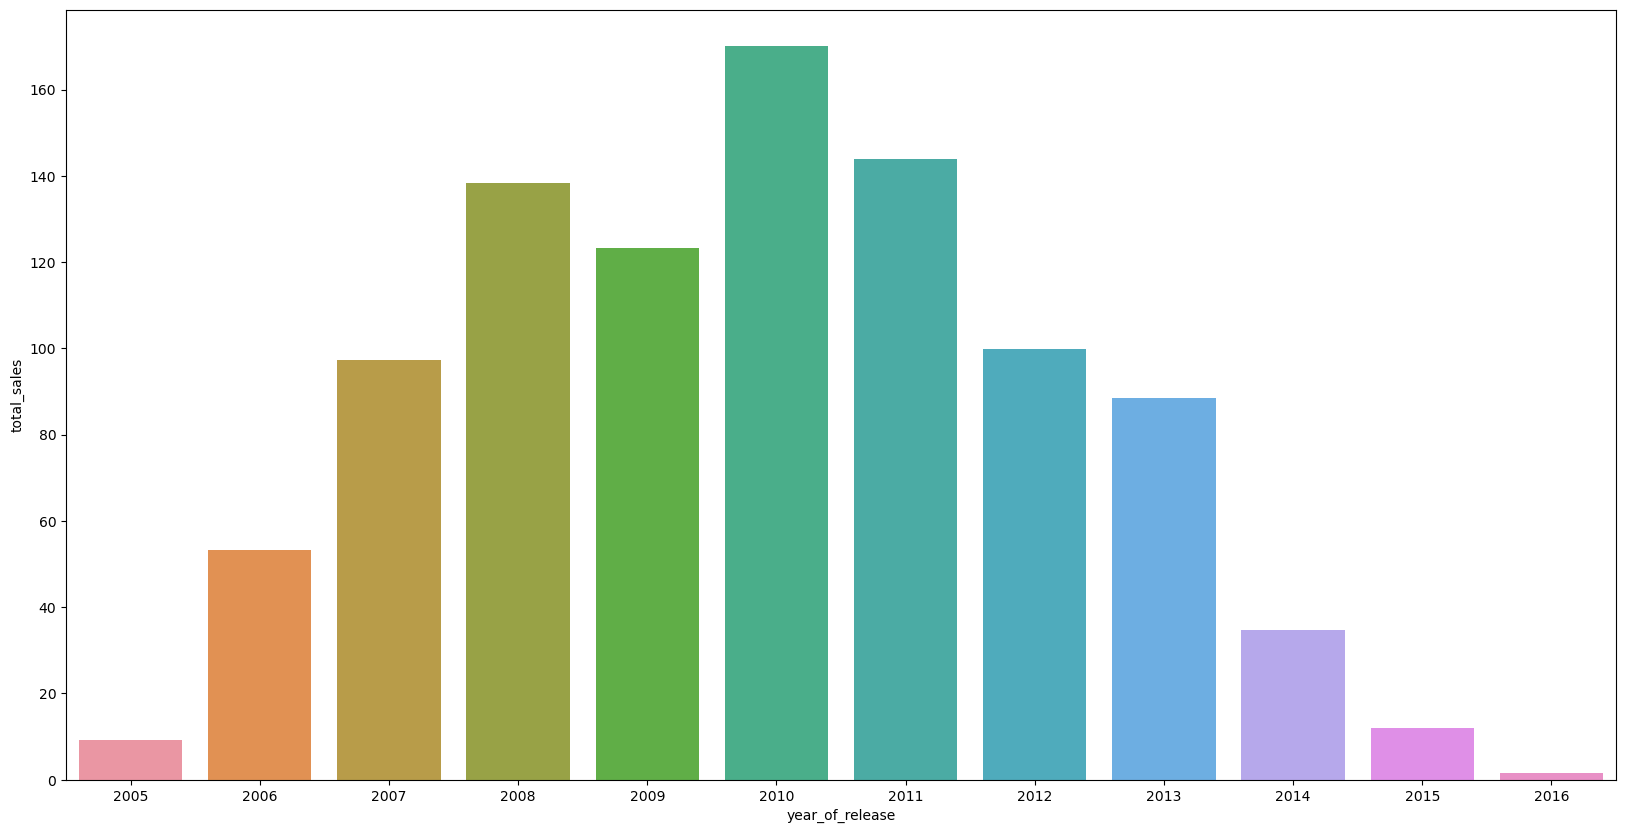

In [31]:
sales_per_platform(data,'X360')

## Melihat penyebaran penjualan game dari tahun ke tahun, tujuannya agar melihat data yang dipakai jumlahnya sesuai atau tidak,jika terlalu sedikit jumlahnya sebaiknya tidak dipakai karena akan mempengaruhi hasil 

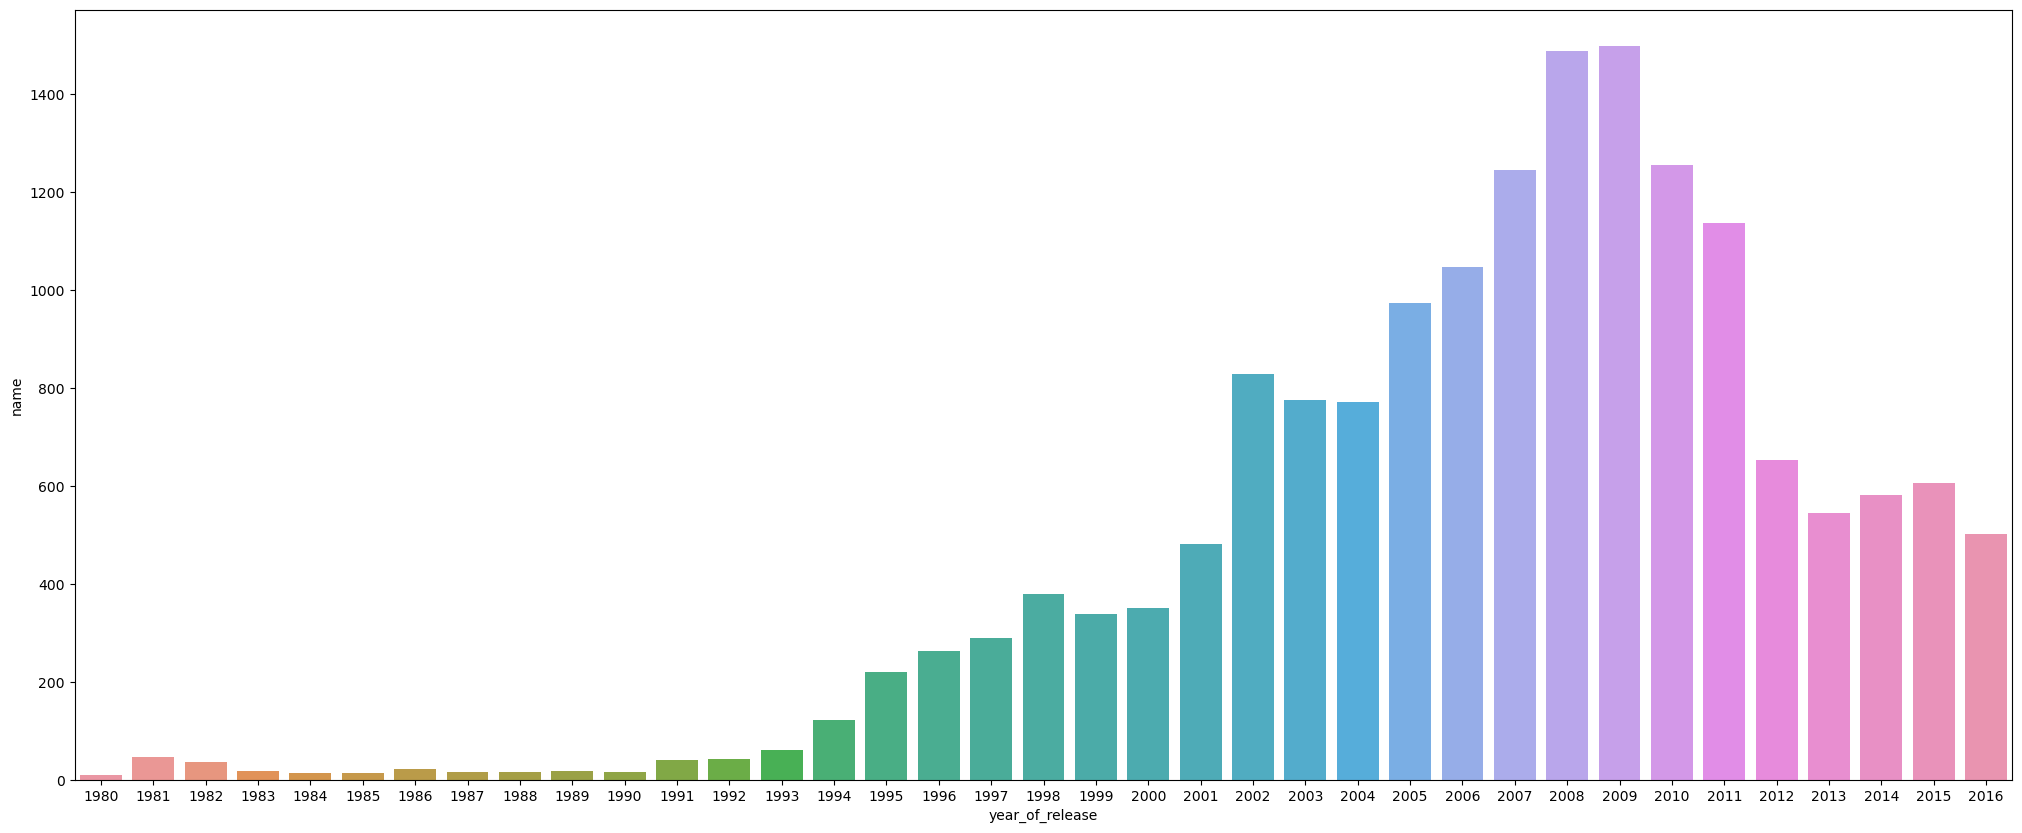

In [32]:
sales = data.groupby('year_of_release')['name'].count().reset_index()
plt.figure(figsize=(25,10))
sns.barplot(data=sales,x='year_of_release',y='name')
plt.show()

Data yang saya gunakan ada di periode waktu penjualan 4 tahun sebelumnya (2012-2016( karena jumlahnya pas dan tidak terlalu sedikit untuk penjualan gamenya

In [33]:
data_use = data[data['year_of_release']>=2012]
data_use

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,73.0,7.8,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,73.0,7.6,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,73.0,7.1,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,73.0,7.4,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,73.0,7.6,NaN,0.01


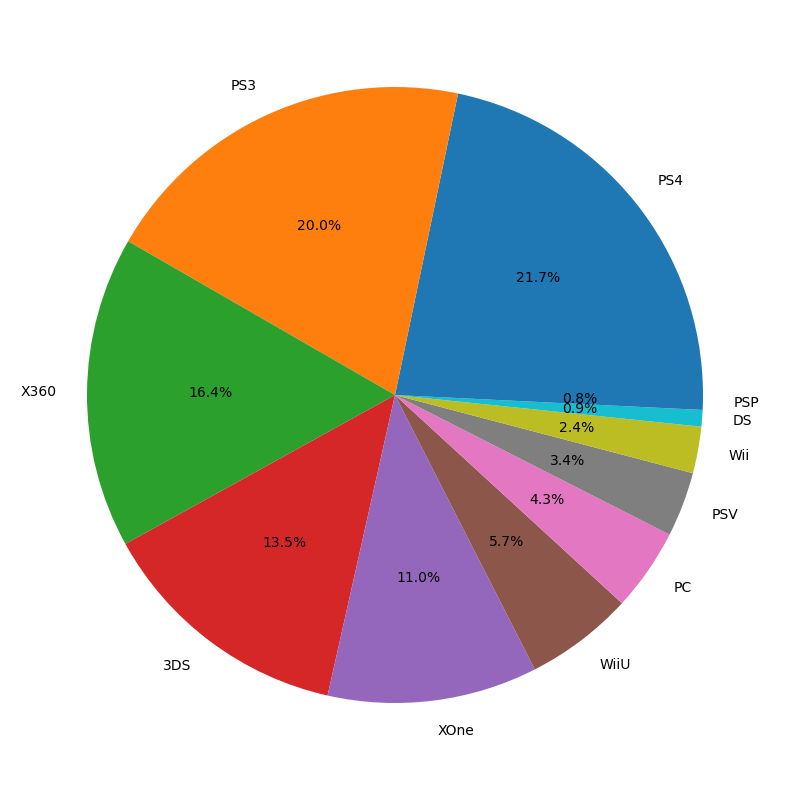

In [34]:
sales_after =data_use.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
plt.figure(figsize=(10,10))
plt.pie(data=sales_after,x='total_sales',labels='platform',autopct='%1.1f%%')
plt.show()

terlihat pada pie diagram diatas penjualan platform terbesar PS4, X360, PS3 setelah tahun 1998. sekarang melihat penyebaran per-platform dalam tahun

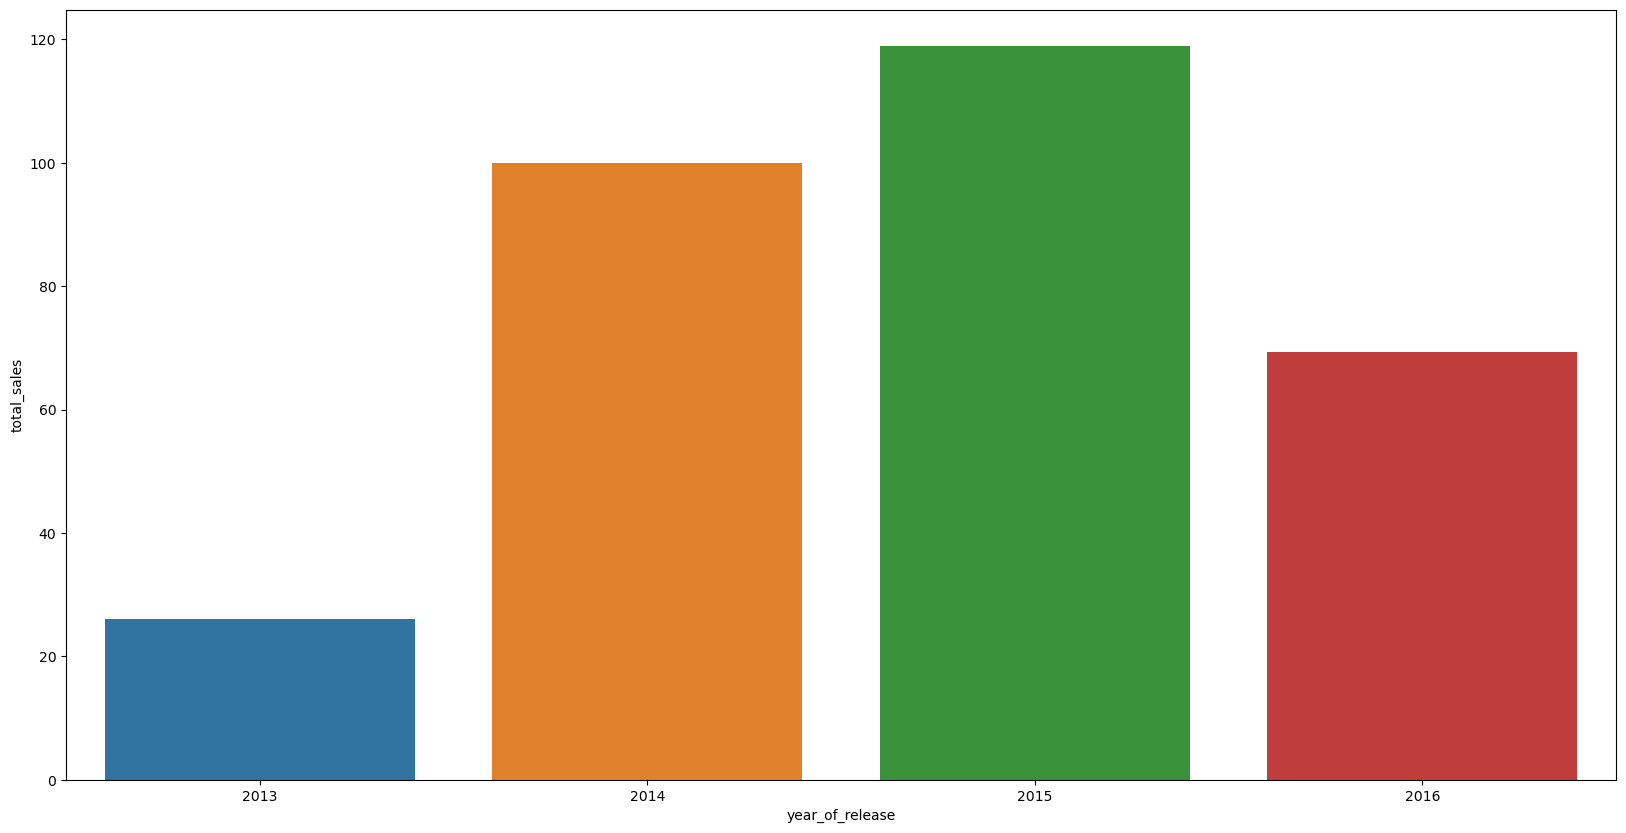

In [35]:
sales_per_platform(data_use,'PS4')

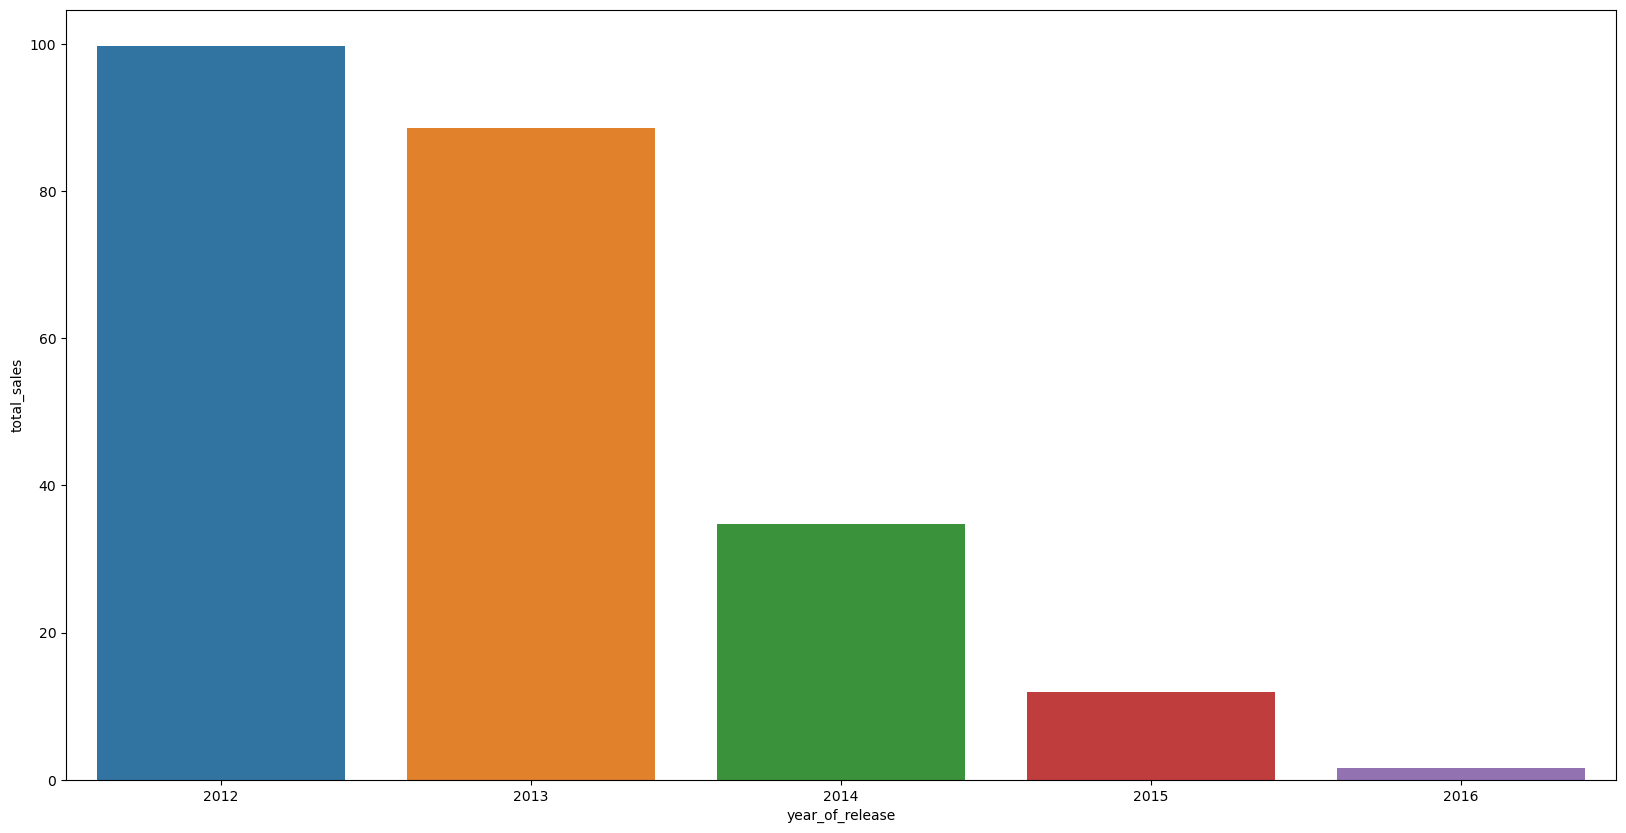

In [36]:
sales_per_platform(data_use,'X360')

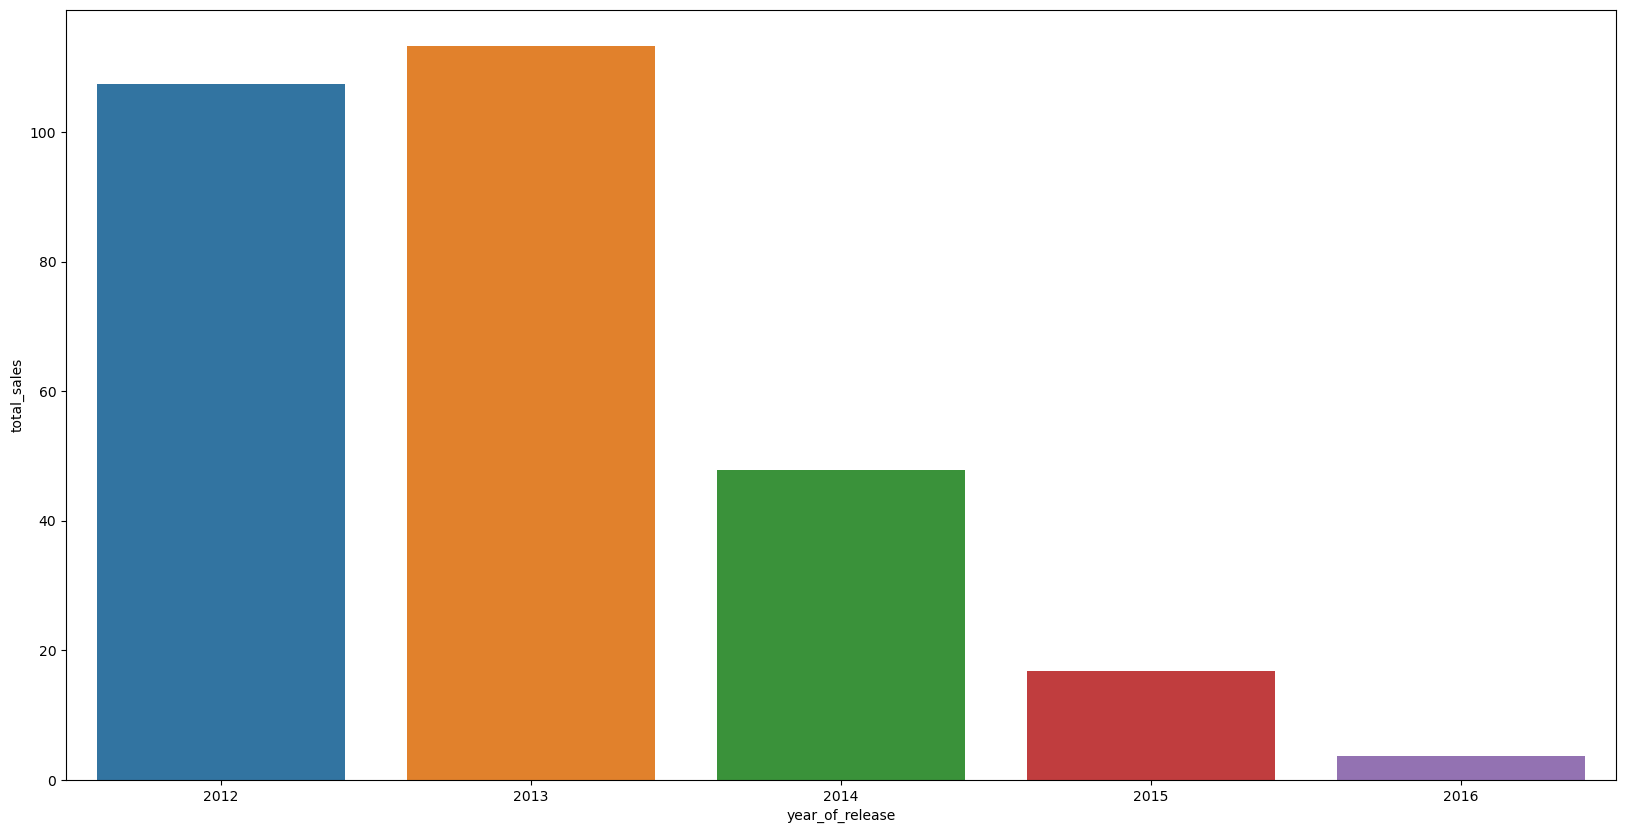

In [37]:
sales_per_platform(data_use,'PS3')

saya melihat penjualan game, berdasarkan 3 platfrom teratas untuk melihat apakah di setiap tahun penjualannya naik/ turun/ tetap

## Melihat total penjualan game yang ada di platform teratas

In [38]:

data_game_platform = data_use[data_use['platform'].isin(['PS4','X360','PS3','3DS','XOne'])]
data_game_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,73.0,7.8,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,73.0,7.4,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,73.0,7.4,NaN,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,73.0,7.4,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,73.0,7.4,NaN,0.01


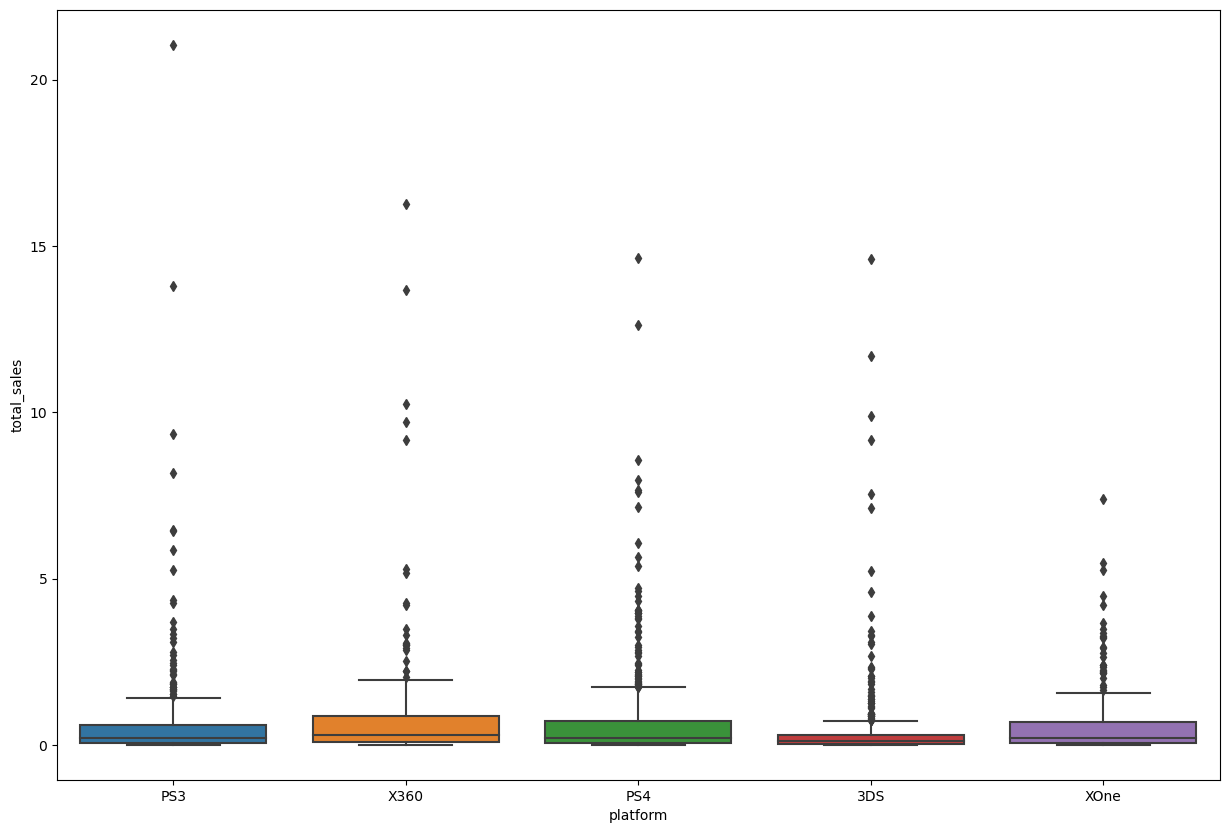

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(data = data_game_platform,x='platform',y='total_sales')
plt.show()

## Lihatlah bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer . Buatlah sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Tarik kesimpulannya.

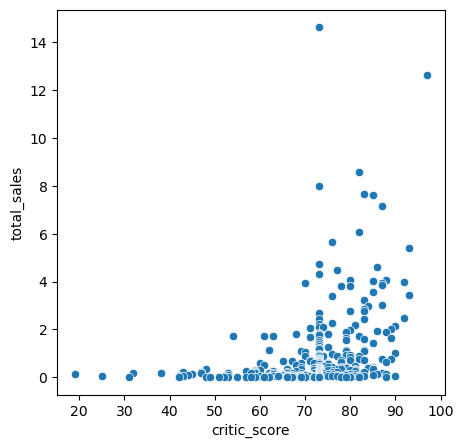

In [40]:
data_ps4 = data_game_platform[data_game_platform['platform']=="PS4"]
plt.figure(figsize=(5,5))
sns.scatterplot(data=data_ps4,x='critic_score',y='total_sales')
plt.show()

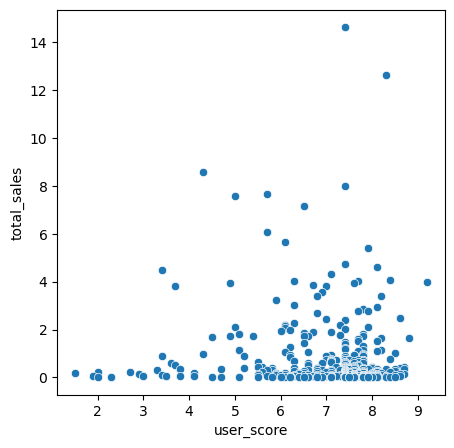

In [41]:
data_ps4 = data_game_platform[data_game_platform['platform']=="PS4"]
plt.figure(figsize=(5,5))
sns.scatterplot(data=data_ps4,x='user_score',y='total_sales')
plt.show()

user_score dan critic_score berpengaruh pada penjualan game, semakin baik scorenya maka semakin baik penjualan gamenya

## Dengan mengingat kesimpulan Anda sebelumnya, bandingkan penjualan game yang sama pada platform lain

In [42]:
game_data = data_use[data_use['name']=='Call of Duty: Black Ops 3']
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,NaN,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73.0,7.4,NaN,7.39
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,73.0,7.4,NaN,1.70
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,73.0,7.4,NaN,1.69
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,73.0,7.4,NaN,0.26


<AxesSubplot:xlabel='name,platform'>

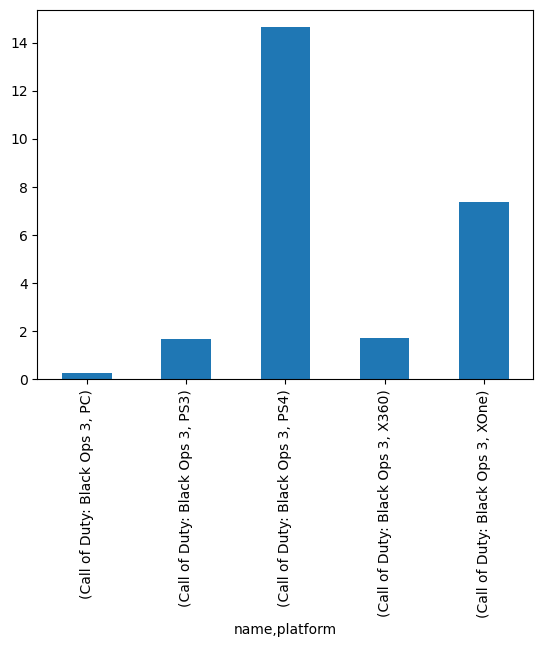

In [43]:
game_data.groupby(['name','platform'])['total_sales'].sum().plot(kind='bar')

Penjualan game Call of Duty ternyata paling bagus berada di platform PS4

## Amati distribusi umum game berdasarkan genre

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

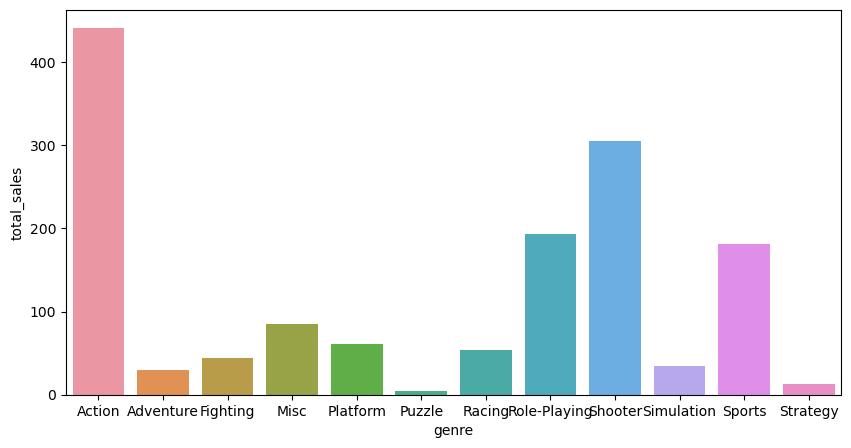

In [45]:
genre = data_use.groupby('genre')['total_sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=genre,x='genre',y='total_sales')

Genre action merupakan genre yang paling diminati 

# Melakukan pemrofilan pengguna untuk masing-masing wilayah

## 5 platform teratas. Jelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.

In [47]:
def area_sales(area):
    data_sale=data_use.groupby('platform')[area].sum().reset_index().sort_values(by=area,ascending=False).head()
    plt.figure(figsize=(8,6))
    plt.pie(data=data_sale,x=area,labels='platform',autopct='%1.1f%%')
    plt.legend()

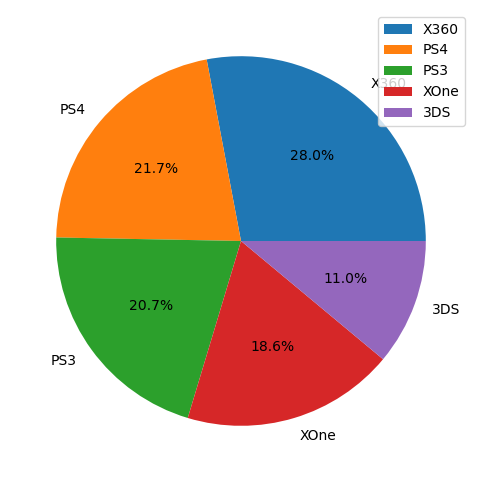

In [48]:
area_sales('na_sales')

di Amerika platform yang paling diminati adalah x360

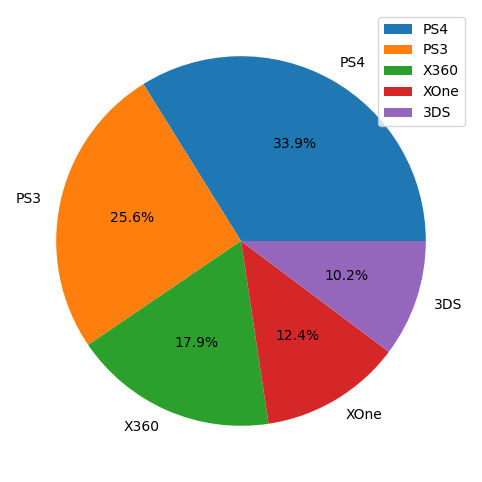

In [49]:
area_sales('eu_sales')

di europe platform yang paling diminati PS 4

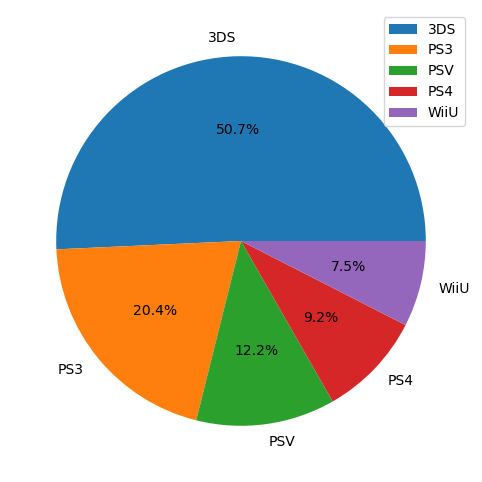

In [50]:
area_sales('jp_sales')

di jepang 3DS adalah platform yang paling diminati

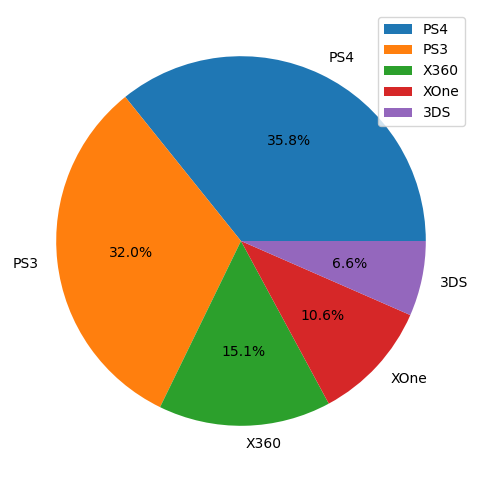

In [51]:
area_sales('other_sales')

di other region PS4 menjadi platform yang paling diminati

## Melihat apakah rating memperngaruhi penjualan di setiap wilayah

In [52]:
def cek_rating(area):
    data_rating= data_use.groupby('rating')[area].sum().reset_index().sort_values(by=area,ascending=False)
    plt.figure(figsize=(8,6))
    plt.pie(data=data_rating,x=area,labels='rating',autopct='%1.1f%%')
    plt.legend()
        

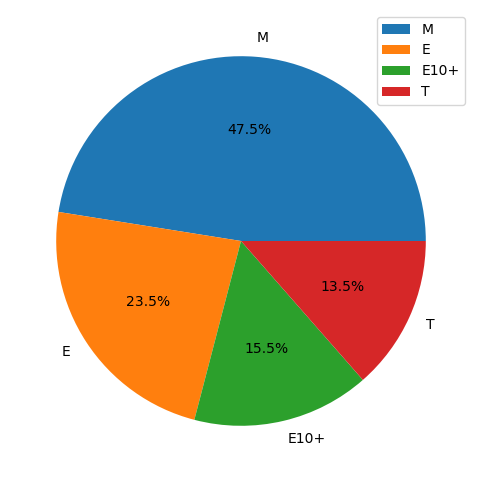

In [53]:
cek_rating('na_sales')

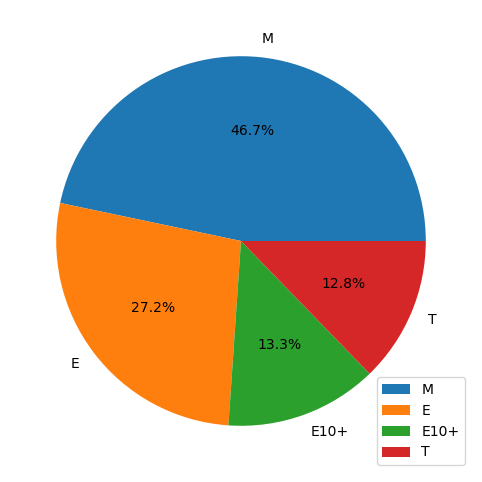

In [54]:
cek_rating('eu_sales')

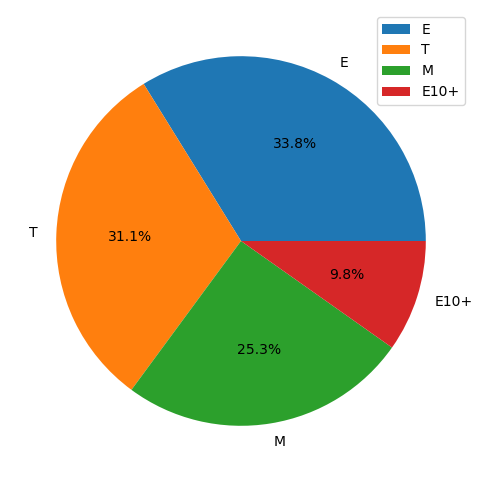

In [55]:
cek_rating('jp_sales')

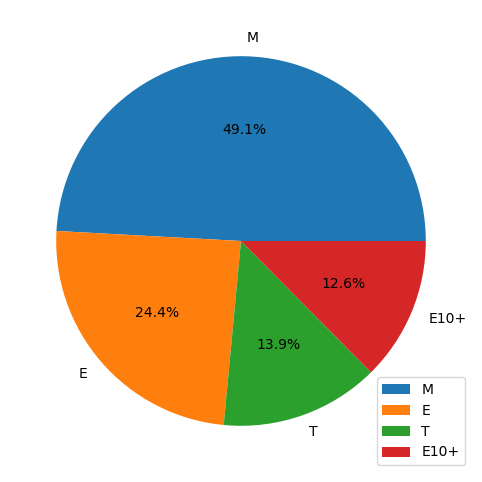

In [56]:
cek_rating('other_sales')

menariknya hanya region jepang yang berbeda disini, di region lain rating mature mendominasi untuk penjualan terbaik rating game sedangkan di jepang rating E(Everyone) adalah rating game yang paling banyak diminati

# Uji Hipotesis

H0 = Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

H1 = Rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama.

In [57]:
alpha  = 0.05

In [58]:
x_one = data_use[data_use['platform']=='XOne'].dropna()
pc = data_use[data_use['platform']=='PC'].dropna()
result = st.ttest_ind(x_one['user_score'],pc['user_score'],equal_var=False)
result

Ttest_indResult(statistic=1.1297906896570749, pvalue=0.2593364605695476)

In [59]:
pvalue = result.pvalue
if pvalue < alpha:
    print('Rata-rata rating pengguna platform Xbox One dan PC adalah sama.')
else:
    print('Rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama.')

Rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama.


H0 = Rata-rata rating pengguna genre Action dan Sports Sama.

H1 = Rata-rata rating pengguna genre Action dan Sports berbeda.

In [60]:
sport = data_use[data_use['genre']=='Sports']
action = data_use[data_use['genre']=='Action']
result2 = st.ttest_ind(sport['user_score'],action['user_score'],equal_var=False)
result2

Ttest_indResult(statistic=-10.246347396686833, pvalue=1.789420203600109e-21)

In [61]:
pvalue = result2.pvalue
if pvalue < alpha:
    print('Rata-rata rating pengguna genre Action dan Sports Sama.')
else:
    print('Rata-rata rating pengguna genre Action dan Sports berbeda.')

Rata-rata rating pengguna genre Action dan Sports Sama.


# Kesimpulan

1. Banyak faktor yang mempengaruhi penjualan sebuah judul game, diantaranya platform yang digunakan untuk memainkan, rating game, penjualan ke region mana, genre game dsb, ini semua saling berkaitan jika ingin melakukan penjualan suatu judul game dengan baik harus mempertimbangkan semua faktor

2. Semakin jadul platform game yang digunakan untuk memainkan sangat mempengaruhi penjualan judul game, mungkin salah satu sebabnya konsol game jadul ditinggalkan adalah kemampuan konol tersebut untuk menjalankan game, semakin baru tahun release game maka harus membutuhkan spesifikasi konsol game yang bagus, artinya disini konsol game keluaran terbaru adalah yang diminati

3. Genre game berpengaruh besar dalam penjualan game

4. Pengaruh user_score dan critic_score dari ahli game berpengaruh pada penjualan, mungkin karena sebelum membeli game orang-orang melihat review judul gamenya dahulu, semakin bagus review maka semakin bagus pula penjualannya

5. Rating game popular yang dimainkan disetiap negara berbeda, tidak semua rating game sama untuk penjualannya


# Saran

1. untuk konsol jenis terbaru ada baiknya diutamakan agar game yang baru release bisa dimainkan di konsol ini

2. jika ingin memasukin pasar setiap region sebaiknya dilihat dulu jenis platform game apa yang mau diutamakan, misalnya di region na platform game yang didistribusikan utama adalah X360 jadi game yang mau dirilis/dijual harus bisa dimainkan di X360

3. sebaiknya untuk game yang dirilis mendapat nilai positif dari user dan reviewer yang ahli dibidangnya agar penjualannya baik, mungkin sebelum game dirilis global diadakan beta test untuk kalangan terbatas gunanya untuk mengetahui feedback mereka dan memperbaiki jika ada kerusakan, jika sudah selesai semua tahap itu baru bisa di release global

4. ada baiknya menjual genre game action, karena dilihat dari hasil diatas genre game action adalah yang paling diminati dan pebedaannya cukup signifikan

5. Rating game berpengaruh untuk penjualan game, mungkin khusus di region jepang lebih mengutamakan rating game E dibanding M, karena mayoritas di Jepang lebih suka memainkan game Rating E